In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, BasicAer, execute
import matplotlib.pyplot as plt
import numpy as np
from qiskit.quantum_info import process_fidelity
%matplotlib inline

In [2]:
def spec1qubit(alpha,N=1000):
    error = np.random.uniform(-alpha,alpha,N)
    theta=0.5*np.arctan((4*alpha-np.sin(4*alpha))/(4*np.sin(2*alpha)))
    theta_approx=(2/3)*alpha**2
    outcome=np.zeros((N))
    for i in range(N):
        qr=QuantumRegister(1)
        cr=ClassicalRegister(1)
        specQ=QuantumCircuit(qr,cr)
        specQ.h(qr[0])
        specQ.rz(-2.*error[i],qr[0])
        specQ.sdg(qr[0])
        specQ.h(qr[0])
        specQ.measure(qr[0],cr[0])
        temp_1=execute(specQ,backend=BasicAer.get_backend('qasm_simulator'),shots=1)
        temp_2=[*temp_1.result().get_counts().keys()]
        temp_3=int(temp_2[0])
        outcome[i]=temp_3
    si=np.array([[1,0],[0,1]])
    sz=np.array([[1,0],[0,-1]])
    def szerror(theta):
        return np.cos(theta)*si+1.j*np.sin(theta)*sz
    processfid=np.zeros((N))
    processfid_nocorrection=np.zeros((N))
    for i in range(N):
        if (outcome[i]==0):
            equiv=np.matmul(szerror(error[i]),szerror(theta))
            processfid[i]=process_fidelity(equiv,si)
        elif (outcome[i]==1):
            equiv=np.matmul(szerror(error[i]),szerror(-theta))
            processfid[i]=process_fidelity(equiv,si)
        processfid_nocorrection[i]=process_fidelity(szerror(error[i]),si)
    return np.mean(processfid), np.mean(processfid_nocorrection)

In [3]:
n=21

alpha=np.linspace(0.01,0.9,n)
processfid_final=np.zeros((len(alpha)))
processfid_final_nocorrection=np.zeros((len(alpha)))
for i in range(n):
    processfid_final[i], processfid_final_nocorrection[i]=spec1qubit(alpha[i])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/lib/python3/dist-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


(-0.1, 1)

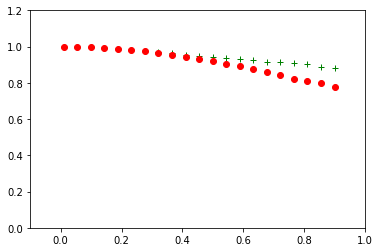

In [4]:
plt.plot(alpha,processfid_final,'g+',alpha,processfid_final_nocorrection,'ro')
plt.ylim(0,1.2)
plt.xlim(-0.1,1)

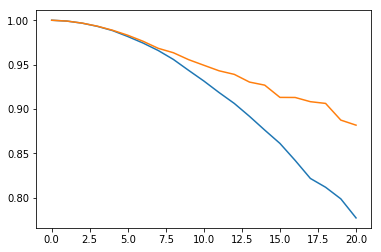

In [5]:
plt.plot(processfid_final_nocorrection)
plt.plot(processfid_final)

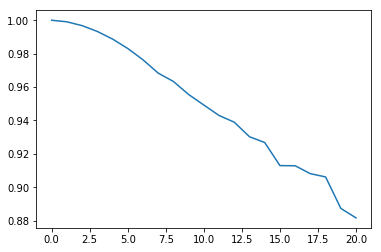

In [6]:
plt.plot(processfid_final)

In [24]:
outcome

NameError: name 'outcome' is not defined